# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty, verbose = True):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty, False)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty, True)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20, verbose = True)

step 0 - action: east
step 1 - action: east
step 2 - action: suck
step 3 - action: west
step 4 - action: east
step 5 - action: west
step 6 - action: west
step 7 - action: north
step 8 - action: north
step 9 - action: suck
step 10 - action: west
step 11 - action: north
step 12 - action: south
step 13 - action: east
step 14 - action: south
step 15 - action: south
step 16 - action: south
step 17 - action: south
step 18 - action: north
step 19 - action: north


2

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

## Bumper Sensors

The bumper sensors identify whether the vacuum has a reached a wall or a corner based on its location. The default value is set as false and is returned unless if the bumpers are activated by a specific location.

I made these sensors a separate function that returns the bumpers to the simulation environment when called.
    
    
__**Worth noting:** Bumpers that are strictly one direction (i.e. just north) mean that the vacuum hit a wall but not a corner.__

In [5]:
def bumper_sensors(nx, ny, position_x, position_y, verbose = True):
    
    bumpers = {"north": False, "south": False, "west": False, "east": False}
    
    # If East
    if(position_x == nx-1):
        # If Northeast
        if(position_y == 0):
            return {"north" : True, "south" : False, "west" : False, "east" : True}
        
        # If Southeast
        elif(position_y == ny-1):
            return {"north" : False, "south" : True, "west" : False, "east" : True}
        
        # If Only East
        else:
            return {"north" : False, "south" : False, "west" : False, "east" : True}
    
    # If West
    elif(position_x == 0):
        if(position_y == 0):
            return {"north" : True, "south" : False, "west" : True, "east" : False}
        elif(position_y == ny-1):
            return {"north" : False, "south" : True, "west" : True, "east" : False}
        else:
            return{ "north" : False, "south" : False, "west" : True, "east" : False}
    
    # If only North or only South
    if(position_y == 0):
        return {"north" : True, "south" : False, "west" : False, "east" : False}
    elif(position_y == ny-1):
        return{"north" : False, "south" : True, "west" : False, "east" : False}

    return bumpers

## Simulation Environment

To summarize the simulation environment I created, it essentially creates the environment with nxn number of squares. It generates a random starting position for the agent used and also assigns a random assortment of squares as either clean or dirty (clean = True, dirty = False). From there, it reacts to the actions outputted by the agent by either cleaning, staying if the square is already clean, or moving to the next square in the direction the agent indicates.

This simulation environment runs until the entire room is clean.


### The Simulation Environment I created keeps track of the following things:
1. Number of dirty squares
2. Starting position of vacuum
3. Bumper sensors
4. Dirt sensors
5. Total number of squares cleaned 
6. **Performance Measure:** Total number of actions (1 action = 1 energy unit)Total number of squares cleaned 

In [6]:
# Your code and description goes here
def simulation_environment(agent, nx, ny, verbose = True): 
    num_cleaned = 0 # Keeping track of swaures cleaned
    num_actions_total = 0
    rng = np.random.default_rng() # create random number generator
    p = 0.2 # use given probability from instructions
    squares = [[rng.random() < p for x in range(nx)] for y in range(ny)] # intitalize squares array w/ clean and dirty squares
    count_dirty = np.count_nonzero(squares) # count number of dirty squares
    print("Number of dirty squares:")
    print(count_dirty)
    
    # Print the squares. True = Dirty, False = Clean
    print("Before: ")
    for x in squares:
        print(x)
    
    # Randomly generate starting position of vacuum
    position_x = rng.integers(low = 0, high = nx-1)
    position_y = rng.integers(low = 0, high = ny-1)
    
    # Get dirt status of starting position
    dirty = squares[position_x][position_y]
    
    # Receive bumper information based on starting position
    bumpers = bumper_sensors(nx, ny, position_x, position_y)
    print("\n",bumpers, "\n")
    
    # Keep running until there are no more dirty squares
    while(count_dirty > 0):
        action = agent(bumpers, dirty, verbose) # Action is the one returned by agent
        
        # Check to see if action is to suck and whether the square is dirty
        if (action == "suck" and squares[position_x][position_y] == True):
            squares[position_x][position_y] = False
            dirty = False
            num_cleaned = num_cleaned + 1
            count_dirty = np.count_nonzero(squares)
        
        #If the square is already dirty, don't do anything to it. Return that it's already clean
        elif (action == "suck" and squares[position_x][position_y] == False):
            action = "already clean - stay in position"
        
        # If the action is to move in a specific direction, move in that direction and reset if it
        # attempts to go outside the bounds
        elif(action == "west"): # West = 0
            position_x -= 1
            if(position_x < 0):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_x = 0
            
        elif(action == "east"): # East = nx-1
            position_x += 1
            if(position_x > nx-1):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_x = nx-1
            

        elif(action == "north"): # North = 0
            position_y -= 1
            if(position_y < 0):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_y = 0
                
        elif(action == "south"): # South = ny-1
            position_y += 1
            if(position_y > ny-1):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_y = ny-1
        
        # Print environment steps 
        if (verbose): print("Environment: Step", num_actions_total , "- action:", action, " position before action: (", position_x, ",", position_y, ")")
        
        num_actions_total += 1
        dirty = squares[position_x][position_y]
        bumpers = bumper_sensors(nx, ny, position_x, position_y)
        count_dirty = np.count_nonzero(squares)
    
    # Print the total number of actions and then the squares layout
    print("\nTotal number of actions: ", num_actions_total, "\n")
    print("After: ")
    for x in squares:
        print(x)

    print("Final Position - (", position_x, ",", position_y, ")")
    print("Number of squares cleaned: ", num_cleaned)    
    return num_actions_total
        
    


### The Verbose Output

In [7]:
simulation_environment(simple_randomized_agent, 5, 5, True)

Number of dirty squares:
5
Before: 
[True, False, True, False, False]
[False, False, True, False, False]
[False, False, False, False, True]
[False, False, False, False, False]
[False, True, False, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

Environment: Step 0 - action: north  position before action: ( 1 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 1 - action: north  position before action: ( 1 , 0 )
Environment: Step 2 - action: east  position before action: ( 2 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 3 - action: north  position before action: ( 2 , 0 )
Environment: Step 4 - action: already clean - stay in position  position before action: ( 2 , 0 )
Environment: Step 5 - action: south  position before action: ( 2 , 1 )
Environment: Step 6 - action: already clean - stay in position  position before action: ( 2 , 1 )
Environment: Step 7 - action: east  position before action: ( 3 , 

Environment: Step 138 - action: north  position before action: ( 2 , 1 )
Environment: Step 139 - action: north  position before action: ( 2 , 0 )
Environment: Step 140 - action: south  position before action: ( 2 , 1 )
Environment: Step 141 - action: west  position before action: ( 1 , 1 )
Environment: Step 142 - action: west  position before action: ( 0 , 1 )
Environment: Step 143 - action: already clean - stay in position  position before action: ( 0 , 1 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 144 - action: west  position before action: ( 0 , 1 )
Environment: Step 145 - action: south  position before action: ( 0 , 2 )
Environment: Step 146 - action: already clean - stay in position  position before action: ( 0 , 2 )
Environment: Step 147 - action: east  position before action: ( 1 , 2 )
Environment: Step 148 - action: east  position before action: ( 2 , 2 )
Environment: Step 149 - action: north  position before action: ( 2 , 1 )
Environment: Step 150 

Environment: Step 258 - action: north  position before action: ( 2 , 1 )
Environment: Step 259 - action: already clean - stay in position  position before action: ( 2 , 1 )
Environment: Step 260 - action: west  position before action: ( 1 , 1 )
Environment: Step 261 - action: south  position before action: ( 1 , 2 )
Environment: Step 262 - action: west  position before action: ( 0 , 2 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 263 - action: west  position before action: ( 0 , 2 )
Environment: Step 264 - action: south  position before action: ( 0 , 3 )
Environment: Step 265 - action: north  position before action: ( 0 , 2 )
Environment: Step 266 - action: already clean - stay in position  position before action: ( 0 , 2 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 267 - action: west  position before action: ( 0 , 2 )
Environment: Step 268 - action: south  position before action: ( 0 , 3 )
Environment: Attempted to move beyond wal

363

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

### Simple Reflex Agent

The Simple Reflex Agent simply cleans if it finds a dirty square and randomly moves around the room otherwise. It already avoids walls, so it does not require that additional logic.

As you can see, the simple reflex agent only reacts to its bumper and dirt sensors.

In [8]:
def simple_reflex_agent(bumpers, dirty, verbose):
    # If the square is dirty, immediately return suck
    if(dirty == True):
        if(verbose): print("\tAgent: Found a dirty square... GROSS... Cleaning now")
        return "suck" # return suck

    # Otherwise, return a random directional action
    if(verbose): print("\tAgent: Moving randomly until dirt is found or wall is found!")
    return np.random.choice(["north", "south", "east", "west"])

### The Verbose Output

In [9]:
simulation_environment(simple_reflex_agent, 5, 5, True)

Number of dirty squares:
2
Before: 
[False, False, True, True, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 0 - action: west  position before action: ( 0 , 2 )
	Agent: Found a dirty square... GROSS... Cleaning now
Environment: Step 1 - action: suck  position before action: ( 0 , 2 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 2 - action: west  position before action: ( 0 , 2 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 3 - action: east  position before action: ( 1 , 2 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 4 - action: east  position before action: ( 2 , 2 )
	Agent: Moving

15

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

### Model-Based Reflex Agent

I had initially done some research on how the agents in Roombas work, and I found that they first do a wall-following pattern and then randomly move around the room. I initially implemented this, but found the logic to be highly convuluted and it became a giant block of code. I decided to switch my approach to one where this agent cleans in a snake formation throughout the entire time. It essentially goes to the northwest corner and immediately starts going from wall to wall while also moving down by one square each time until the room is completely clean.

This agent keeps track of different phases:
- **Phase One:** Where the agent has reached the northwest corner and is ready to clean
- **Phase Two:** Where the agent begins cleaning and moving in snake formation around the room


In [10]:
# Declare set of global variables (need to be reset later)
phase_one = False
cleaned = []
row = -1
col = -1
direction = "east"

def Model_Based_Reflex(bumpers, dirty, verbose):
    global phase_one
    global direction
    global clean
    global row
    global col

    # Check if phase one is complete, if it isn't, then check if it reached the NW corner
    if(phase_one == False):
        if(bumpers.get("north") == True and bumpers.get("west") == True):
            phase_one = True
            print("\tAgent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.")
            row = 0 # Set the row and column as 0 so the agent knows where it is
            col = 0
            
            # As usual... if dirty, clean it
            if(dirty):
                print("\tAgent: Found a dirty square... GROSS... Cleaning now")
                return "suck"
            else: 
                print("\tAgent: Moving to next corner!")
                return "east"
        # If it hasn't reached the corner, then the agent will move to the NW corner by moving north, then west
        if(bumpers.get("north") == False):
            print("\tAgent: Moving to Position 0 (Northwest Corner)\n\tMoving...")
            return "north"
        elif(bumpers.get("west") == False):
            print("\tAgent: Moving to Position 0 (Northwest Corner)\n\tMoving...")
            return "west"

    else:
        # Phase one is now complete, so clean as usual or focus on moving to the next wall/down
        if(dirty):
            if(verbose): print("\tAgent: Found a dirty square... GROSS... Cleaning now")
            cleaned.append([row, col])
            return "suck"
        else:
            if(not(bumpers.get(direction))):
                if(direction == "east"):
                    if(verbose): print("\tAgent: Moving to east wall")
                    col += 1
                else:
                    if(verbose): print("\tAgent: Moving to west wall")
                    col -= 1
                return direction
            else:
                if(direction == "east"):
                    if(verbose): print("\tAgent: Wall reached! Moving south and continuing west.")
                    direction = "west"
                else:
                    if(verbose): print("\tAgent: Wall reached! Moving south and continuing east.")
                    direction = "east"
                row += 1
                return "south"
        # Not used for anything in particular, but the roomba is moving!
        moving = True

In [11]:
simulation_environment(Model_Based_Reflex, 5, 5, False)

Number of dirty squares:
8
Before: 
[True, True, False, False, False]
[False, False, False, True, True]
[True, False, False, False, False]
[False, False, False, True, False]
[True, False, True, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Found a dirty square... GROSS... Cleaning now

Total number of actions:  35 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position 

35

In [12]:
# Resetting the global variables 

phase_one = False
cleaned = []
row = -1
col = -1
direction = "east"

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [14]:
# Declare the environment sizes
environment_sizes = [5, 10, 100]

# Create lists for the different agents
simple_random = []
simple_reflex = []
model_reflex = []

# For loop through each agent's non-verbose output.
print("\nCurrent Agent - Simple Randomized")
for x in range(100):
    n = np.random.choice(environment_sizes)
    print("Random Environment Size: ", n)
    simple_random.append([n, simulation_environment(simple_randomized_agent, n, n, False)])
    print("\n**************************************************\n")
    



Current Agent - Simple Randomized
Random Environment Size:  20
Number of dirty squares:
68
Before: 
[False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False]
[False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False]
[False, True, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, True, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
[False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, True, False, False, True, False, True, False, True, False, False, True, False, False, False, True, True, False]
[False, False, False, False, False, False, True, False, False, False, Fals


Total number of actions:  17163 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

16
Before: 
[False, True, False, False, False, False, False, True, False, False]
[False, False, False, True, True, False, False, False, False, False]
[True, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, True, False, False, False, False, False, False, True, True]
[False, False, True, True, True, False, False, False, False, False]
[False, False, True, False, False, False, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False]
[False, False, False, False, False, False, True, False, False, True]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  1735 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, 


Total number of actions:  17740 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

Total number of actions:  11576 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

Total number of actions:  13570 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,


Total number of actions:  17861 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

[False, False, False, False, True, False, False, False, False, True]

 {'north': True, 'south': False, 'west': False, 'east': False} 


Total number of actions:  1678 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 5 , 8 )
Number of squares cleaned:  28

**************************************************

Ra

Total number of actions:  13670 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,


Total number of actions:  14637 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

Total number of actions:  4530 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 0 , 5 )
Number of squares cleaned:  26

**************************************************

Random Environment Size:  20
Number of dirty squares:
72
Before: 
[False, False, True, False, False, False, False, False, False, False, Fa


Total number of actions:  20859 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False


After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 9 , 2 )
Number of squares cleaned:  14

**************************************************

Random Environment Size:  10
Number of dirty squares:
22
Before: 
[False, True, False, False, False, True, True, False, True, False]
[False, False, False, False, False, F


Total number of actions:  21459 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False


Total number of actions:  14200 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False


Total number of actions:  14285 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False


Total number of actions:  18912 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False


Total number of actions:  17459 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

Total number of actions:  3532 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 8 , 5 )
Number of squares cleaned:  25

**************************************************

Random Environment Size:  20
Number of dirty squares:
67
Before: 
[False, False, False, False, False, False, True, False, True, False, Fal

Total number of actions:  3536 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 4 , 8 )
Number of squares cleaned:  16

**************************************************

Random Environment Size:  20
Number of dirty squares:
86
Before: 
[True, False, False, False, True, False, False, False, False, True, Fals


Total number of actions:  36333 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False


Total number of actions:  13027 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

Total number of actions:  857 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 2 , 2 )
Number of squares cleaned:  5

**************************************************

Random Environment Size:  5
Number of dirty squares:
7
Before: 
[False, False, True, True, False]
[False, False, True, False, False]
[False, True, False, False, True]
[False, False, False, True, False]
[True, False, False, False, False]

 {'north': False, 'south': False, 'west': True, 'east': False} 


Total number of actions:  310 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 0 , 3 )
Number of squares cleaned:  7

**************************************************

Random Environment Size:  10
Number 

In [15]:
# Simple Reflex Agent 
print("\nCurrent Agent - Simple Reflez")
for x in range(100):
    n = np.random.choice(environment_sizes)
    print("Random Environment Size: ", n)
    simple_reflex.append([n, simulation_environment(simple_reflex_agent, n, n, False)])
    print("\n**************************************************\n")


Current Agent - Simple Reflez
Random Environment Size:  5
Number of dirty squares:
4
Before: 
[False, False, False, False, False]
[False, False, True, True, False]
[False, False, True, False, False]
[True, False, False, False, False]
[False, False, False, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  122 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 2 , 2 )
Number of squares cleaned:  4

**************************************************

Random Environment Size:  5
Number of dirty squares:
5
Before: 
[False, True, False, False, False]
[False, False, False, False, False]
[False, False, False, False, True]
[False, True, True, False, False]
[False, False, False, True, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:

Total number of actions:  1460 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 8 , 2 )
Number of squares cleaned:  23

**************************************************

Random Environment Size:  10
Number of dirty squares:
25
Before: 
[False, False, False, False, False, False, False, False, True, False]
[F

Final Position - ( 17 , 19 )
Number of squares cleaned:  85

**************************************************

Random Environment Size:  10
Number of dirty squares:
25
Before: 
[False, False, False, False, False, False, False, True, False, False]
[True, False, False, False, False, False, False, True, True, False]
[False, True, False, False, False, False, False, False, False, False]
[True, True, True, False, False, True, True, False, True, False]
[False, False, False, False, False, False, False, False, False, False]
[False, True, True, False, False, True, True, False, True, False]
[True, False, True, True, True, False, False, True, False, False]
[True, False, False, False, False, False, False, True, True, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, True, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  690 

After: 
[False, False, False, False,

Number of dirty squares:
18
Before: 
[False, False, False, True, False, False, False, False, False, False]
[False, False, True, False, True, False, False, False, False, False]
[False, False, False, True, False, True, False, False, False, False]
[False, False, False, False, False, False, False, True, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, True, False, False, False, False, False, True, False]
[True, True, False, False, False, False, False, False, True, False]
[False, False, True, False, False, False, False, False, True, False]
[False, False, True, True, False, False, False, False, False, False]
[True, False, False, False, False, True, False, False, False, True]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  1081 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False

[False, False, False, True, False]
[True, False, False, False, False]
[False, False, False, False, False]

 {'north': False, 'south': False, 'west': True, 'east': False} 


Total number of actions:  223 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 1 , 4 )
Number of squares cleaned:  3

**************************************************

Random Environment Size:  20
Number of dirty squares:
82
Before: 
[True, True, False, True, False, True, True, True, True, False, False, False, False, True, False, False, False, False, True, True]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False]
[False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, True, False, 

Total number of actions:  1115 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 7 , 7 )
Number of squares cleaned:  15

**************************************************

Random Environment Size:  5
Number of dirty squares:
5
Before: 
[False, False, False, False, False]
[True, False, False, True, False]
[Fal

Total number of actions:  7469 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

Before: 
[False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
[False, False, True, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False]
[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False]
[False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False]
[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True]
[True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False]
[True, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False]
[True, False, False, False, 

Total number of actions:  6097 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

[False, False, False, False, False, True, False, False, False, False]
[False, False, False, True, False, False, False, False, True, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  465 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 0 , 9 )
Number of square

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  907 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 6 , 9 )
Number of squares cleaned:  19

**************************************************

Random Environment Size:  20
Number of dirty squares:
84
Before: 
[False

Total number of actions:  3698 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

Total number of actions:  8748 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

Final Position - ( 18 , 5 )
Number of squares cleaned:  72

**************************************************

Random Environment Size:  10
Number of dirty squares:
19
Before: 
[False, False, False, False, False, True, False, False, False, False]
[False, False, False, False, True, False, False, False, False, True]
[False, False, False, False, False, False, False, True, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[True, True, False, True, False, False, False, True, False, False]
[True, False, False, False, False, True, True, False, False, False]
[False, True, False, False, False, False, False, False, True, False]
[True, False, False, True, False, False, False, True, False, True]
[False, False, False, False, False, True, False, False, True, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  764 

After: 
[False, False, False, F

Final Position - ( 0 , 0 )
Number of squares cleaned:  8

**************************************************

Random Environment Size:  20
Number of dirty squares:
83
Before: 
[False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, True, False]
[False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False]
[True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False]
[True, False, False, False, False, False, True, False, True, True, False, False, False, False, False, True, False, True, False, False]
[False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False]
[Tr

Total number of actions:  79 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 3 , 2 )
Number of squares cleaned:  3

**************************************************

Random Environment Size:  5
Number of dirty squares:
4
Before: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[True, False, False, False, True]
[True, False, False, False, True]

 {'north': True, 'south': False, 'west': False, 'east': False} 


Total number of actions:  78 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 3 , 0 )
Number of squares cleaned:  4

**************************************************

Random Environment Size:  5
Number 

[False, False, False, False, False]
Final Position - ( 4 , 1 )
Number of squares cleaned:  7

**************************************************

Random Environment Size:  10
Number of dirty squares:
19
Before: 
[False, False, True, False, False, False, False, False, False, False]
[False, True, False, False, False, False, True, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False]
[False, False, False, False, True, False, False, False, False, False]
[False, False, True, True, False, False, False, True, False, True]
[True, False, False, False, True, False, False, True, True, False]
[False, False, False, False, False, False, False, False, False, True]
[False, False, False, True, False, False, False, False, False, True]
[False, False, True, False, False, False, True, True, False, False]

 {'north': True, 'south': False, 'west': False, 'east': False} 


Total number of actions:  843 

[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 9 , 3 )
Number of squares cleaned:  18

**************************************************

Random Environment Size:  5
Number of dirty squares:
5
Before: 
[False, False, False, False, False]
[True, False, False, True, False]
[False, False, False, False, False]
[False, False, True, False, False]
[False, True, False, True, False]

 {'north':

Total number of actions:  4828 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[Fals

Final Position - ( 0 , 4 )
Number of squares cleaned:  5

**************************************************

Random Environment Size:  20
Number of dirty squares:
75
Before: 
[False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True]
[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]
[True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False]
[False, True, False, False, False, True, False, False, False, False, False, False, True, True, False, True, True, False, False, False]
[False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, True, False]

In [16]:
# Model-Based Reflex
# Reset global variables after each run 
print("\nCurrent Agent - Model-Based Reflex")
for x in range(100):
    n = np.random.choice(environment_sizes)
    print("Random Environment Size: ", n)
    model_reflex.append([n, simulation_environment(Model_Based_Reflex, n, n, False)])
    phase_one = False
    cleaned = []
    row = -1
    col = -1
    direction = "east"
    print("\n**************************************************\n")


Current Agent - Model-Based Reflex
Random Environment Size:  10
Number of dirty squares:
17
Before: 
[True, False, True, False, False, False, False, False, False, True]
[False, False, False, False, False, False, False, False, False, False]
[False, True, False, False, False, False, False, False, True, False]
[False, False, False, False, False, False, False, False, False, False]
[False, True, False, False, True, True, False, False, False, False]
[False, False, False, False, False, False, False, False, True, False]
[True, False, False, False, False, True, False, False, True, False]
[False, True, False, False, True, False, False, False, False, True]
[False, False, True, False, False, False, False, False, False, False]
[False, True, False, False, False, False, False, False, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Po


Total number of actions:  522 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

Total number of actions:  123 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 4 , 9 )
Number of squares cleaned:  19

**************************************************

Random Environment Size:  10
Number of dirty squares:
22
Before: 
[False, True, False, True, False, False, True, True, False, False]
[False

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Final Position - ( 2 , 19 )
Number of squares cleaned:  75

**************************************************

Random Environment Size:  10
Number of dirty squares:
27
Before: 
[False, False, True, False, True, False, False, False, True, False]
[False, True, False, False, False, False, False, False, True, True]
[False, False, False, True, False, True, False, True, False, True]
[False, True, False, False, False, False, False, False, False, False]
[False, False, False, False, False, True, False, False, True, False]
[False, True, False, True, False, True, False, False, False, False]
[False, False, False, False, False, False, False, False, False, True]
[False, True, True, True, False, False, False, False, False, False]
[True, True, False, False, False, False, False, False, True, True]
[False, False, False, False, True, True, False, False, False, True

Total number of actions:  496 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  496 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 


Total number of actions:  468 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

6
Before: 
[False, True, False, False, False]
[False, False, False, False, True]
[False, False, False, True, False]
[True, True, False, False, False]
[False, False, True, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  31 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 1 , 4 )
Number of squares cleaned:  6

**************************************************

Random Environment Size:  20
Number of dirty squares:
72
Before: 
[Fa

77
Before: 
[True, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True]
[False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False]
[False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False]
[False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False]
[False, True, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False]
[False, False, False, Fa

	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  131 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 0 , 9 )
Number of squares cleaned:  20

**************************************************

Random Environ

Number of dirty squares:
82
Before: 
[False, False, True, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False]
[False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True]
[False, False, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False]
[False, False, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, True, False, False]
[False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False]
[False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, True, False, False, True]
[False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True]
[False,

	Agent: Found a dirty square... GROSS... Cleaning now

Total number of actions:  482 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, Fa

28
Before: 
[True, False, False, False, False, True, False, False, False, False]
[False, False, False, False, False, False, False, False, True, False]
[True, True, True, False, False, False, False, True, False, False]
[False, False, True, False, False, False, False, False, False, False]
[False, False, False, False, False, True, True, False, False, False]
[False, True, True, False, False, True, True, False, False, True]
[True, False, False, True, False, False, False, False, True, False]
[True, False, False, False, False, False, True, False, False, False]
[True, False, True, False, False, True, False, False, True, False]
[False, True, False, False, True, True, False, True, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Ag

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 9 , 9 )
Number of squares cleaned:  14

**************************************************

Random Environment Size:  5
Number of dirty squares:
4
Before: 
[False, False, False, True, False]
[False, False, False, False, False]
[True, False, False, False, False]
[

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving.

Number of dirty squares:
19
Before: 
[False, False, False, False, True, False, False, True, False, False]
[False, False, False, False, True, False, False, False, True, False]
[False, True, True, False, False, False, False, False, False, True]
[False, True, False, False, False, False, True, False, False, False]
[False, False, False, False, False, True, False, True, False, False]
[False, False, True, False, False, False, True, False, False, False]
[False, True, False, True, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, True]
[False, True, False, False, False, False, False, False, False, False]
[False, False, False, False, True, False, False, True, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0


Total number of actions:  485 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 


Total number of actions:  473 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

Total number of actions:  32 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 2 , 4 )
Number of squares cleaned:  7

**************************************************

Random Environment Size:  10
Number of dirty squares:
23
Before: 
[False, False, False, True, False, False, False, True, False, False]
[False, False, False, False, False, True, False, False, True, True]
[False, True, False, False, False, False, False, False, True, False]
[True, False, False, False, False, False, True, True, True, False]
[False, True, True, False, False, False, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False]
[False, False, True, False, False, False, False, False, True, True]
[True, False, False, False, False, False, False, True, False, False]
[False, False, False, False, False, False, False, False,

In [17]:
d_srandom = {}
d_sreflex = {}
d_mreflex = {}

for tuple in simple_random:
    key,val = tuple
    d_srandom.setdefault(key, []).append(val)
for tuple in simple_reflex:
    key,val = tuple
    d_sreflex.setdefault(key, []).append(val)
for tuple in model_reflex:
    key,val = tuple
    d_mreflex.setdefault(key, []).append(val)

sim_rand_avg = []
sim_refl_avg = []
mod_refl_avg = []
    
print("Simple Randomized Agent Results: ")
for name, values in d_srandom.items():
    print("\t{name} {avg}".format(name=name, avg=sum(values)/len(values)))
    sim_rand_avg.append([name, avg])
    
    
print("Simple Reflex Agent Results: ")
for name, values in d_sreflex.items():
    print("\t{name} {avg}".format(name=name, avg=sum(values)/len(values)))
    sim_refl_avg.append([name, avg])
    
print("Model-based Reflex Agent Results: ")
for name, values in d_mreflex.items():
    print("\t{name} {avg}".format(name=name, avg=sum(values)/len(values)))
    mod_refl_avg.append([name, avg])

Simple Randomized Agent Results: 
	20 19086.91176470588
	10 2875.7096774193546
	5 445.6857142857143
Simple Reflex Agent Results: 
	5 153.59459459459458
	20 6641.3
	10 895.4242424242424
Model-based Reflex Agent Results: 
	10 120.92307692307692
	20 490.6774193548387
	5 28.266666666666666


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

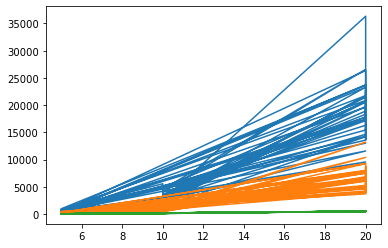

In [21]:
import matplotlib.pyplot as plt

simple_random_transposed = np.array(simple_random).T
simple_reflex_transposed = np.array(simple_reflex).T
model_reflex_transposed = np.array(model_reflex).T

x, y_simple = simple_random_transposed
x1, y_reflex = simple_reflex_transposed
x2, y_model = model_reflex_transposed

plt.plot(x, y_simple, label='Simple Random Agent')
plt.plot(x1, y_reflex, label='Simple Reflex Agent')
plt.plot(x2, y_model, label= "Model Reflex Agent")

In [ ]:
plt.plot(x, y_simple, label='Simple Random Agent')

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).


### Rectangular Room of Unknown Size
If my agents were placed in a rectangular room with an unknown size, they should still perform will because of the environmental constraints I created. Instead of creating the environment as just one nxn room, I made it to where the x-dimension had its own n size (nx) and the y-dimension also has its own n size (ny). The bumper sensors and everything should react accordingly.

### Irregular Cleaning Area
If the cleaning area has an irregular shape, the agents should still clean relatively well. However, in the scenario of a hallway connecting two rooms, I could foresee the Model-Based Reflex Agent only cleaning one half of one room and one half of the other since it makes the assumption that it is cleaning a singular room and it moves in a snake pattern to clean. So it would clean one half of the first room, go through the hallway, and clean the second half of the second room. The other agents are relatively random, so I could see it cleaning both rooms, but taking forever to do so.

### A Room with Obstacles
The agents I created do not have the functionality to avoid obstacles. However, if I was to create that sort of an implementation, I would most likely create a tuple array for each square where you can see whether its clean and whether there is some sort of object there (also a boolean). If there is an object there, then the agent would then avoid running over that square and it will move around it.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [ ]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code